<a href="https://colab.research.google.com/github/FatoniRahmat/Data-Analyst-in-Python/blob/main/Superstore_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup Environment & Run Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Load Data

In [2]:
#Read data from google sheet
sheet_url = 'https://docs.google.com/spreadsheets/d/11K6_kWXJzVXAwfEgtFT3x4GX6gekaOn1/edit#gid=1982625353'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,1/6/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.0,106.14,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.1,36.04,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,1/5/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.0,29.64,8.17,High,2011
3,IT-2011-3647632,1/1/2011,1/5/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.5,-26.06,4.82,High,2011
4,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.1,37.77,4.70,Medium,2011


#Basic steps
1.Check Variable Names

2.Check Data Type

3.Handle Missing Values

4.Check Duplicate Records

##1. Check Variable Names
Column names provide a clear identification of the data contained within each column. By reviewing the column names, i can quickly understand the type of information stored in each column. This helps me make sense of the data and interpret it correctly.


In [3]:
#Check columns
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

Now, we change the order and delete the columns:

In [4]:
#Change the column order
col_order = ['order_id', 'order_date', 'customer_name', 'segment', 'state', 'country',
             'market', 'region', 'product_id', 'category', 'sub_category', 'product_name',
             'sales', 'quantity', 'discount', 'profit', 'shipping_cost', 'ship_date',
             'ship_mode', 'order_priority', 'year']
df = df[col_order]
pd.set_option('display.max_columns', None)
#Delete column year
del df['year']
df.head(2)

,order_id,order_date,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,ship_date,ship_mode,order_priority
0,AG-2011-2040,1/1/2011,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.0,106.14,35.46,1/6/2011,Standard Class,Medium
1,IN-2011-47883,1/1/2011,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.1,36.04,9.72,1/8/2011,Standard Class,Medium


##2. Check Data Type
Checking the data types is an important step in data cleaning because it helps ensure the consistency, accuracy, and reliability of the data.

In [5]:
#Check data type
df.dtypes

order_id           object
order_date         object
customer_name      object
segment            object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales              object
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
ship_date          object
ship_mode          object
order_priority     object
dtype: object

Based on data documentation, we must check whether the data type of variables is correct or not. The result shows, there is something wrong about order_date, segment, category, sub_category, sales, ship_date, ship_mode.

In [6]:
#Change data type
df['order_date'] = pd.to_datetime(df.order_date,).dt.tz_localize(None)
df['ship_date'] = pd.to_datetime(df.ship_date,).dt.tz_localize(None)
df['sales'] = df['sales'].apply(str).str.replace(',','').astype(np.float64)
df['ship_mode'] = df['ship_mode'].astype('category')
df['segment'] = df['segment'].astype('category')
df['category'] = df['category'].astype('category')
df['sub_category'] = df['sub_category'].astype('category')
df.dtypes

order_id                  object
order_date        datetime64[ns]
customer_name             object
segment                 category
state                     object
country                   object
market                    object
region                    object
product_id                object
category                category
sub_category            category
product_name              object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
ship_date         datetime64[ns]
ship_mode               category
order_priority            object
dtype: object

##3. Handle Missing Values
Checking for missing values is an important step in data cleaning because missing values can have a significant impact on the quality and reliability of the data analysis. Missing values can lead to incomplete or inaccurate data, which can skew the analysis and produce misleading results. By identifying and handling missing values appropriately, me ensure the integrity and reliability of the data.

In [7]:
#Check the amount of missing values
df.isnull().sum()

order_id          0
order_date        0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
ship_date         0
ship_mode         0
order_priority    0
dtype: int64

So, they are not missing values in the rows.

##4. Check Duplicate Rows
Duplicate rows can compromise the integrity of the dataset. If we have multiple identical rows, it can lead to inaccurate statistical analysis, misleading results, and duplicate entries in downstream processes. By identifying and removing duplicate rows, we ensure that the data accurately represents the underlying information.

In [8]:
#Check for duplicate data
df.duplicated().sum()

0

So, they are not duplicated rows.

#Adding Columns

Adding columns Month and Day from 'order_date' for future analysis.

In [9]:
#Add the columns Month, Day and Hour for the order_date
df.insert(loc=2, column='year_month', value=df['order_date'].apply(lambda x: x.strftime('%Y-%m')))
df.insert(loc=3, column='month', value=df.order_date.dt.month)
#+1 to make Monday=1.....until Sunday=7
df.insert(loc=4, column='day', value=(df.order_date.dt.dayofweek)+1)

In [10]:
df.head()

,order_id,order_date,year_month,month,day,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,ship_date,ship_mode,order_priority
0,AG-2011-2040,2011-01-01,2011-01,1,6,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.0,106.14,35.46,2011-01-06,Standard Class,Medium
1,IN-2011-47883,2011-01-01,2011-01,1,6,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.1,36.04,9.72,2011-01-08,Standard Class,Medium
2,HU-2011-1220,2011-01-01,2011-01,1,6,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.0,29.64,8.17,2011-01-05,Second Class,High
3,IT-2011-3647632,2011-01-01,2011-01,1,6,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.5,-26.06,4.82,2011-01-05,Second Class,High
4,IN-2011-47883,2011-01-01,2011-01,1,6,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.1,37.77,4.70,2011-01-08,Standard Class,Medium


#Export the File
Export cleaned data.

In [11]:
#Export data
df.to_csv('Superstore_Dataset_Cleaned.csv')

#Exploratory Data Analysis (EDA)

##1. Number of sales


In [26]:
#Group sales by month
sales_by_month = df.groupby('year_month').sum()['sales'].reset_index()
sales_by_month.head()

<ipython-input-26-e5a3d00a0177>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_month = df.groupby('year_month').sum()['sales'].reset_index()


,year_month,sales
0,2011-01,98898.53
1,2011-02,91152.23
2,2011-03,145729.51
3,2011-04,116915.78
4,2011-05,146747.86


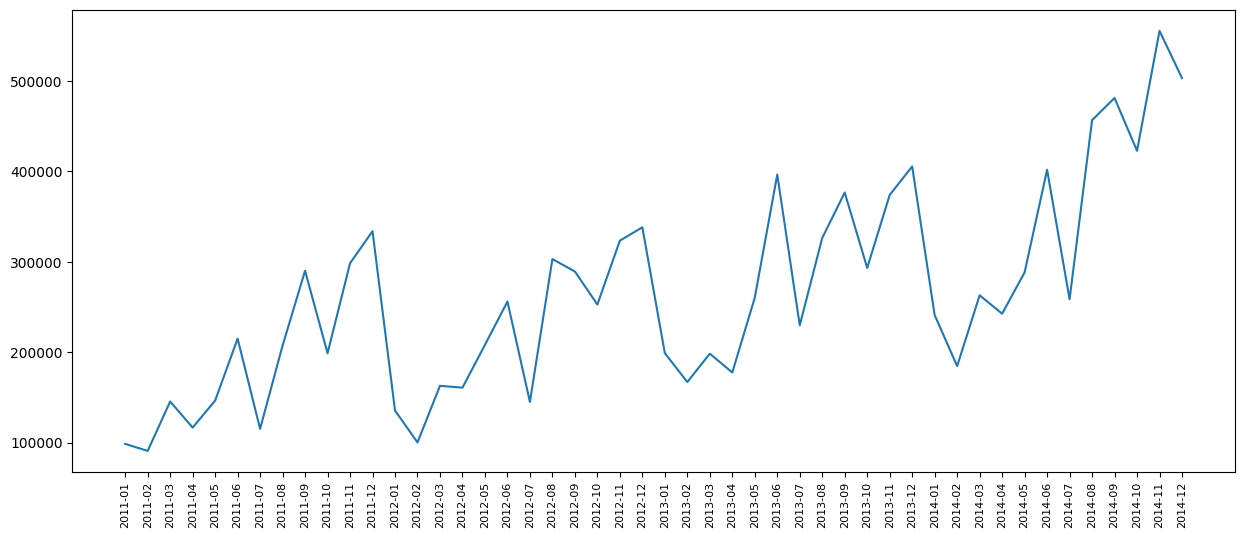

In [13]:
#Create sales per month graph
plt.figure(figsize=(15,6))
plt.plot(sales_by_month['year_month'],sales_by_month['sales'])
plt.xticks(rotation='vertical',size=8)
plt.show()

In [14]:
#Top 10 country by sales
df['country'].value_counts().head(10)

United States     9994
Australia         2837
France            2827
Mexico            2644
Germany           2065
China             1880
United Kingdom    1633
Brazil            1599
India             1555
Indonesia         1390
Name: country, dtype: int64

##2. Most selling prodcuts

In [15]:
#Top 10 most sales products
products_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])
products_sales = products_sales.sort_values('sales',ascending=False)
products_sales[:10]

<ipython-input-15-db3168f3cb29>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  products_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])


,sales
product_name,
"Apple Smart Phone, Full Size",86935.79
"Cisco Smart Phone, Full Size",76441.53
"Motorola Smart Phone, Full Size",73156.33
"Nokia Smart Phone, Full Size",71904.56
Canon imageCLASS 2200 Advanced Copier,61599.83
"Hon Executive Leather Armchair, Adjustable",58193.52
"Office Star Executive Leather Armchair, Adjustable",50661.68
"Harbour Creations Executive Leather Armchair, Adjustable",50121.52
"Samsung Smart Phone, Cordless",48653.46


In [16]:
#Top 10 most quantity selling products items
products_by_quantity = pd.DataFrame(df.groupby('product_name').sum()['quantity'])
products_by_quantity_sorted = products_by_quantity.sort_values('quantity',ascending=False)
products_by_quantity_sorted[:10]

<ipython-input-16-09c8698e52fc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  products_by_quantity = pd.DataFrame(df.groupby('product_name').sum()['quantity'])


,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


##3. Most profitable product categories & sub categories

In [17]:
#Top 10 profitable product
cateory_by_profit = pd.DataFrame(df.groupby(['category','sub_category']).sum()['profit'])
cateory_by_profit.sort_values(['profit'],ascending=False).head(10)

<ipython-input-17-b6d368bc2d72>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cateory_by_profit = pd.DataFrame(df.groupby(['category','sub_category']).sum()['profit'])


profit
category        sub_category           
Technology      Copiers       258567.63
                Phones        216717.49
Furniture       Bookcases     161924.37
                Chairs        141973.78
Office Supplies Appliances    141680.65
Technology      Accessories   129626.44
Office Supplies Storage       108461.74
                Binders        72449.61
                Paper          59207.26
Technology      Machines       58867.70

##4. Most selling segments

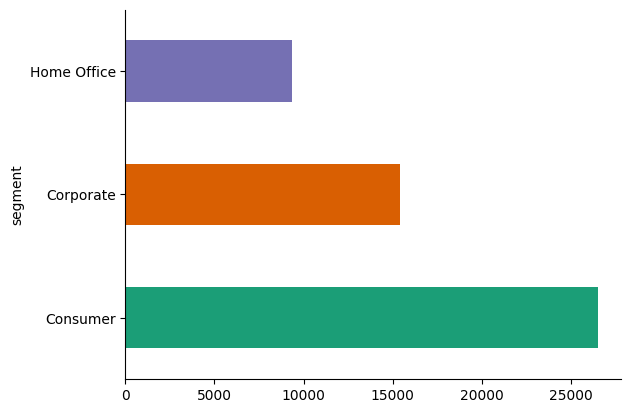

In [18]:
#Selling segments graph
df.groupby('segment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [19]:
#Segments by selling quantity
by_segment = pd.DataFrame(df.groupby('segment').sum()['quantity'])
by_segment_sort = by_segment.sort_values('quantity',ascending=False)
by_segment_sort

<ipython-input-19-2a6756b35f18>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_segment = pd.DataFrame(df.groupby('segment').sum()['quantity'])


,quantity
segment,
Consumer,92157
Corporate,53565
Home Office,32590


In [20]:
#Segments by profit
by_segment_p = pd.DataFrame(df.groupby('segment').sum()['profit'])
by_segment_sort_p = by_segment_p.sort_values('profit',ascending=False)
by_segment_sort_p

<ipython-input-20-8829aaed4500>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_segment_p = pd.DataFrame(df.groupby('segment').sum()['profit'])


,profit
segment,
Consumer,749239.28
Corporate,442785.69
Home Office,277009.28


##5. Shiping

In [21]:
#Distribution of days to shipment
df['shiping_days'] = df['ship_date']-df['order_date']
df['shiping_days'].value_counts()

4 days    14434
5 days    11221
2 days     7026
6 days     6255
3 days     5035
7 days     3057
0 days     2600
1 days     1662
Name: shiping_days, dtype: int64

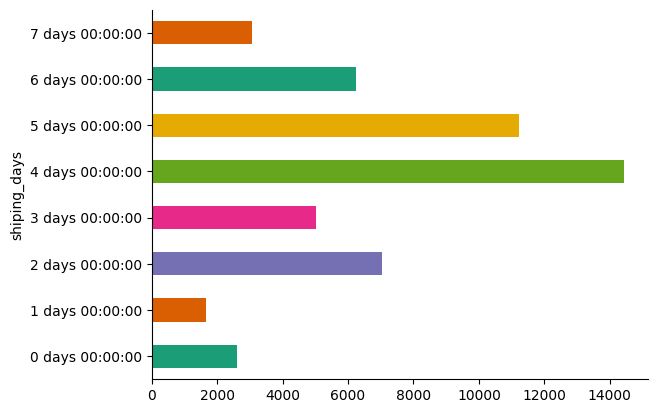

In [22]:
#Days for delivery graph
df.groupby('shiping_days').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

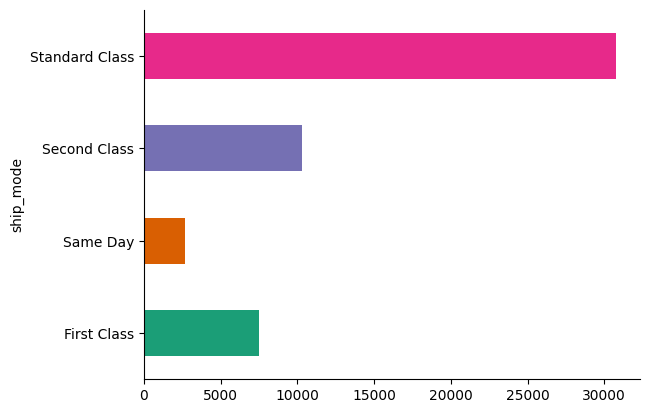

In [23]:
#Ship mods graph
df.groupby('ship_mode').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [24]:
#Distribution of shiping modes
ship_mode = pd.DataFrame(df['ship_mode'].value_counts()).reset_index()
ship_mode = ship_mode.rename({'index': 'shiping_mode', 'ship_mode': 'count'}, axis=1)
ship_mode.head()

,shiping_mode,count
0,Standard Class,30775
1,Second Class,10309
2,First Class,7505
3,Same Day,2701


In [25]:
#Sub-categories by shiping cost
by_shiping_cost = pd.DataFrame(df.groupby('sub_category').sum()['shipping_cost'])
by_shiping_cost_sort = by_shiping_cost.sort_values('shipping_cost',ascending=False)
by_shiping_cost_sort.head()

<ipython-input-25-981261767bc6>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_shiping_cost = pd.DataFrame(df.groupby('sub_category').sum()['shipping_cost'])


,shipping_cost
sub_category,
Phones,184902.77
Chairs,164229.85
Copiers,159496.49
Bookcases,155482.23
Storage,120546.46
